In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [60]:
file = 'input/terrorism_cleanup.csv'

In [61]:
data = pd.read_csv(file, encoding="ISO-8859-1")

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181683 entries, 0 to 181682
Data columns (total 12 columns):
year               181683 non-null int64
month              181683 non-null int64
day                181683 non-null int64
country_name       181683 non-null object
region_txt         181683 non-null object
city               181249 non-null object
latitude           177129 non-null float64
longitude          177128 non-null float64
attacktype1_txt    181683 non-null object
targtype1_txt      181683 non-null object
natlty1_txt        180124 non-null object
weaptype1_txt      181683 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 16.6+ MB


In [63]:
data.corr().head()

,year,month,day,latitude,longitude
year,1.000000,0.000061,0.018223,0.166921,0.003917
month,0.000061,1.000000,0.005449,-0.016005,-0.003880
day,0.018223,0.005449,1.000000,0.003417,-0.002285
latitude,0.166921,-0.016005,0.003417,1.000000,0.001463
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000


In [64]:
data.columns

Index(['year', 'month', 'day', 'country_name', 'region_txt', 'city',
       'latitude', 'longitude', 'attacktype1_txt', 'targtype1_txt',
       'natlty1_txt', 'weaptype1_txt'],
      dtype='object')

In [79]:
data.rename(columns={'year':'Year','month':'Month','day':'Day','country_name':'Country','region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude','attacktype1_txt':'AttackType','targtype1_txt':'Target_type','natlty1_txt':'Nationality','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
data.head()

,Year,Month,Day,Country,Region,City,Latitude,Longitude,AttackType,Target_type,Nationality,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Dominican Republic,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,United States,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),United States,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),United States,Incendiary


In [80]:
data.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
City            434
Latitude       4554
Longitude      4555
AttackType        0
Target_type       0
Nationality    1559
Weapon_type       0
dtype: int64

In [82]:
data1=data[['Year','Month','Day','Country','Region','City','Latitude','Longitude','AttackType','Target_type','Weapon_type']]
data1.head()

,Year,Month,Day,Country,Region,City,Latitude,Longitude,AttackType,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary


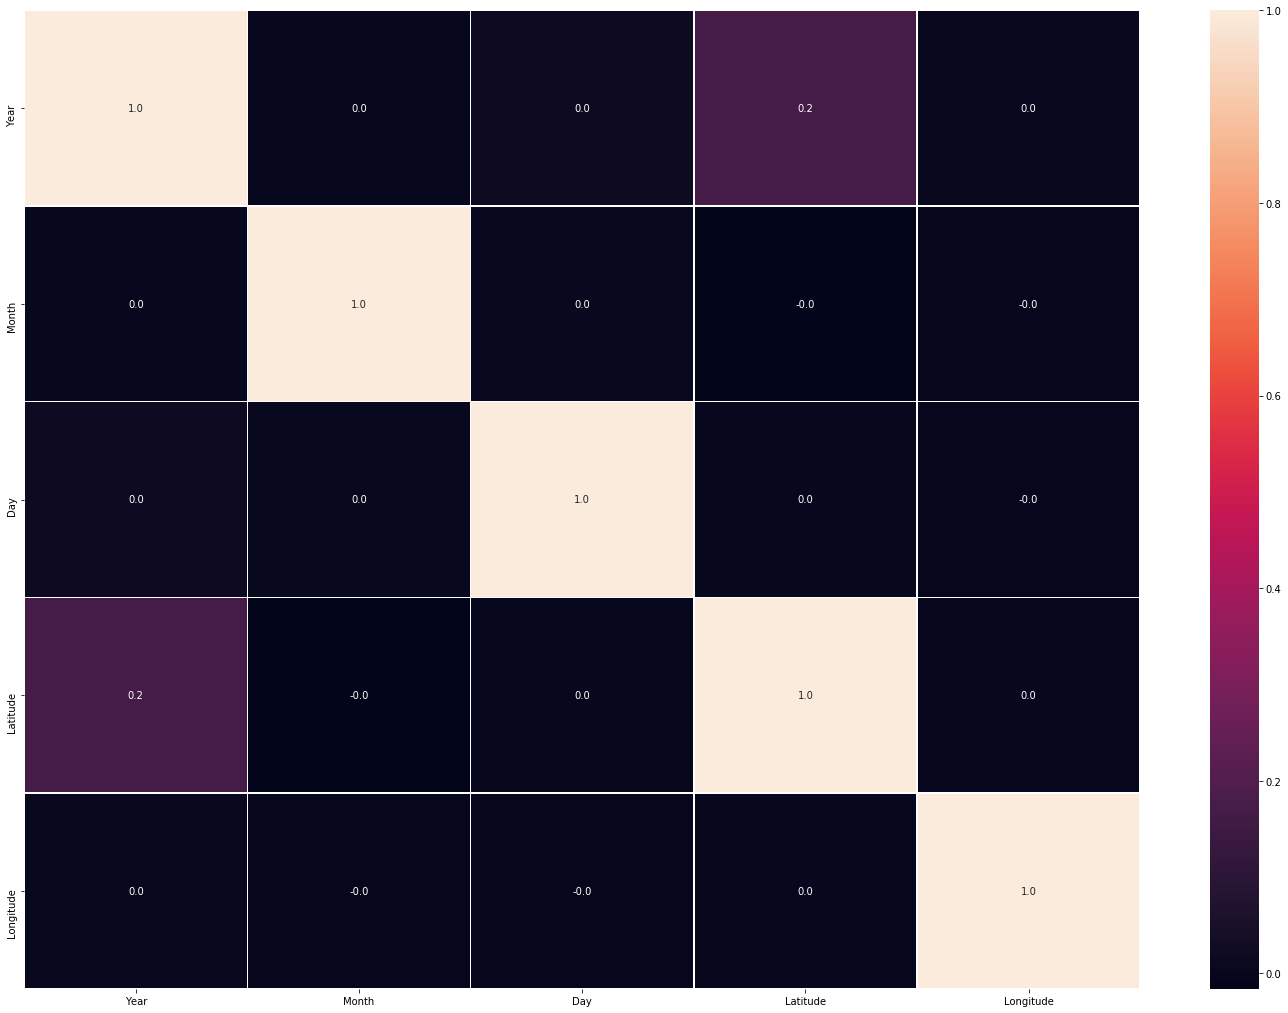

In [83]:
f,ax = plt.subplots(figsize=(25, 18))
sns.heatmap(data1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [84]:
data1['Country'].value_counts().head()

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11957
Colombia        8306
Name: Country, dtype: int64

In [85]:
data1['Region'].value_counts().head()

Middle East & North Africa    50472
South Asia                    44971
South America                 18978
Sub-Saharan Africa            17550
Western Europe                16636
Name: Region, dtype: int64

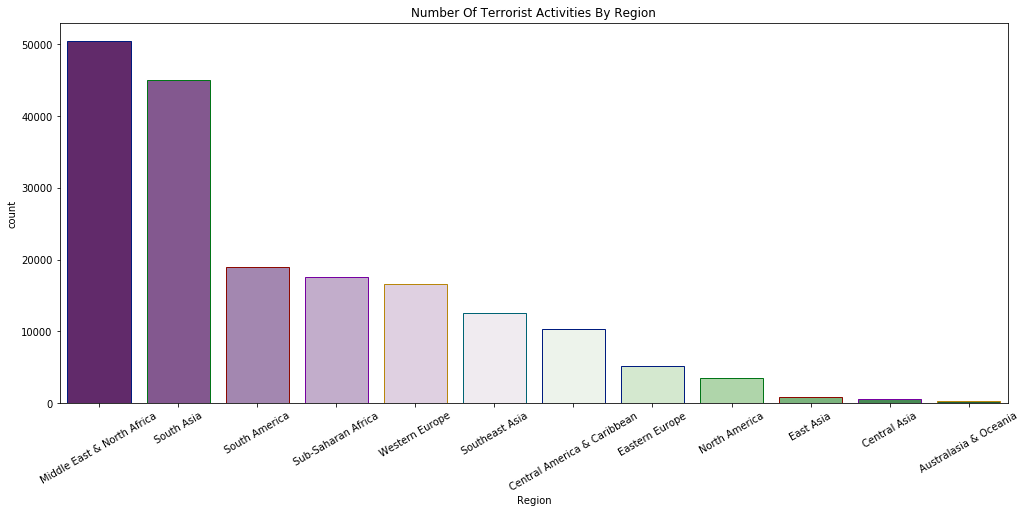

In [86]:
plt.subplots(figsize=(17,7))
sns.countplot('Region',data=data,palette='PRGn',edgecolor=sns.color_palette('dark',7),order=data['Region'].value_counts().index)
plt.xticks(rotation=30)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

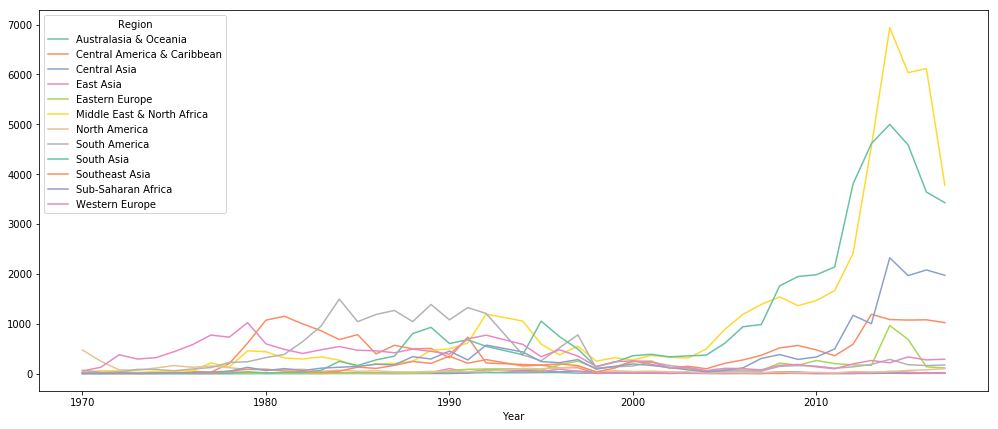

In [87]:
terror_region=pd.crosstab(data.Year,data.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(17,7)
plt.show()

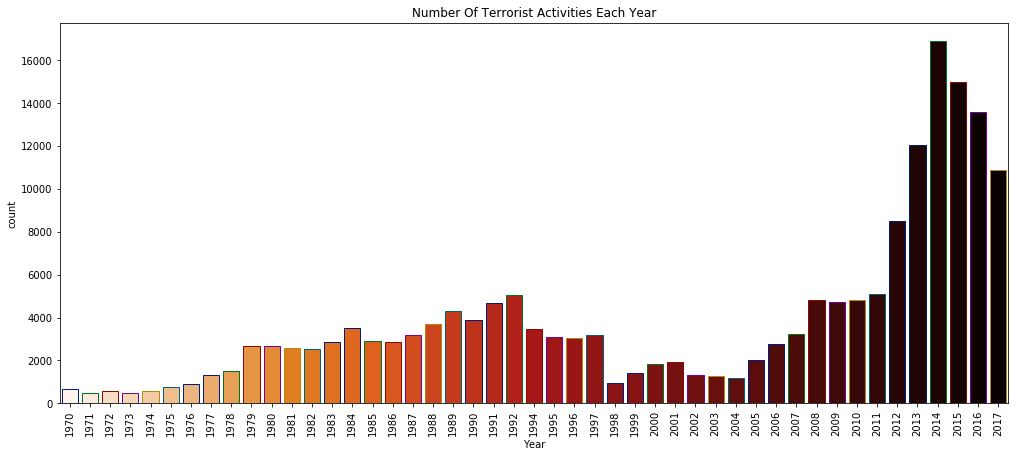

In [88]:
plt.subplots(figsize=(17,7))
sns.countplot('Year',data=data, palette='gist_heat_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

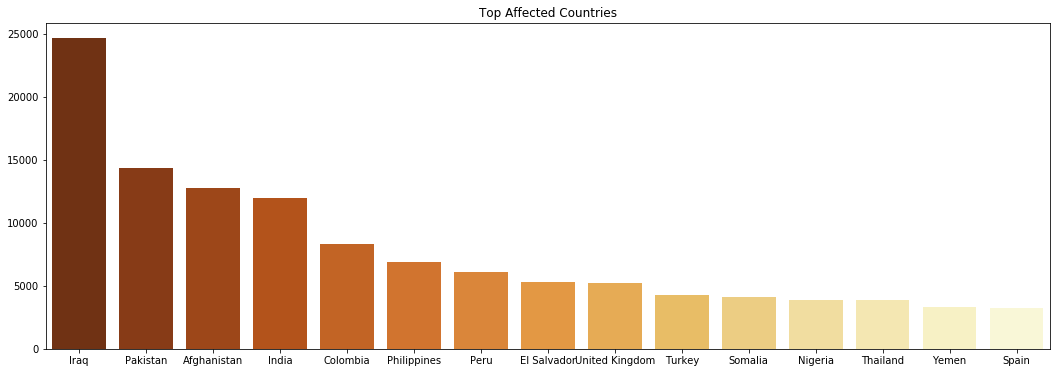

In [89]:
plt.subplots(figsize=(18,6))
sns.barplot(data['Country'].value_counts()[:15].index,data['Country'].value_counts()[:15].values,palette='YlOrBr_r')
plt.title('Top Affected Countries')
plt.show()